<a href="https://colab.research.google.com/github/A-S-Adithiyaa/5thSEM/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

In [5]:
train = pd.read_csv("/content/drive/MyDrive/emnist-letters-train.csv")
test = pd.read_csv("/content/drive/MyDrive/emnist-letters-test.csv")

In [6]:
print(train.shape)
print(test.shape)

(88799, 785)
(14799, 785)


In [32]:
x1 = np.array(train.iloc[:, 1:].values)
y1 = np.array(train.iloc[:, 0].values)

x2 = np.array(test.iloc[:, 1:].values)
y2 = np.array(test.iloc[:, 0].values)

In [22]:
print(x1.shape)
print(y1.shape)
print(x2.shape)
print(y2.shape)

(88799, 784)
(88799,)
(14799, 784)
(14799,)


In [9]:
train_data_reshaped = train_data[1].reshape((28, 28))

In [10]:
train_data_reshaped.shape

(28, 28)

In [11]:
train_label[1]

16

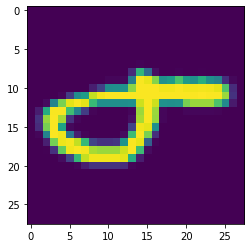

In [12]:
plt.imshow(train_data_reshaped)

In [23]:
train_images = x1 / 255.0
test_images = x2 / 255.0

In [24]:
train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)

In [25]:
train_images.shape

(88799, 28, 28, 1)

In [26]:
test_images.shape

(14799, 28, 28, 1)

In [27]:
type(y1)

numpy.ndarray

In [28]:
len(y1)

88799

In [34]:
number_of_classes = 37

y1 = tf.keras.utils.to_categorical(y1, number_of_classes)
y2 = tf.keras.utils.to_categorical(y2, number_of_classes)

In [35]:
y1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [36]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

In [37]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2,random_state = 42)

model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

In [38]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
 
MCP = ModelCheckpoint('Best_points.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [40]:
history = model.fit(train_x,train_y,epochs=10,validation_data=(test_x,test_y),callbacks=[MCP,ES,RLP])

Epoch 1/10
2220/2220 [==============================] - ETA: 0s - loss: 0.5739 - accuracy: 0.8215
Epoch 1: val_accuracy improved from -inf to 0.86903, saving model to Best_points.h5
2220/2220 [==============================] - 19s 5ms/step - loss: 0.5739 - accuracy: 0.8215 - val_loss: 0.3915 - val_accuracy: 0.8690 - lr: 0.0010
Epoch 2/10
2218/2220 [============================>.] - ETA: 0s - loss: 0.2874 - accuracy: 0.9058
Epoch 2: val_accuracy improved from 0.86903 to 0.89037, saving model to Best_points.h5
2220/2220 [==============================] - 10s 5ms/step - loss: 0.2872 - accuracy: 0.9058 - val_loss: 0.3411 - val_accuracy: 0.8904 - lr: 0.0010
Epoch 3/10
2216/2220 [============================>.] - ETA: 0s - loss: 0.2268 - accuracy: 0.9258
Epoch 3: val_accuracy improved from 0.89037 to 0.89814, saving model to Best_points.h5
2220/2220 [==============================] - 10s 5ms/step - loss: 0.2268 - accuracy: 0.9258 - val_loss: 0.3535 - val_accuracy: 0.8981 - lr: 0.0010
Epoch 4

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 512)               2769408   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 37)                4773      
                                                        